# Global mean time series (atmosphere)

This notebook shows how to use the global-mean timme-series diagnostic.

In [1]:
import sys
sys.path.insert(0, '../')

The convenience function `plot_timeseries` provides an easy interface to plot gloabl time series for a given experiment and vairable.

FDB5 binary library not present on system, disabling FDB support.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


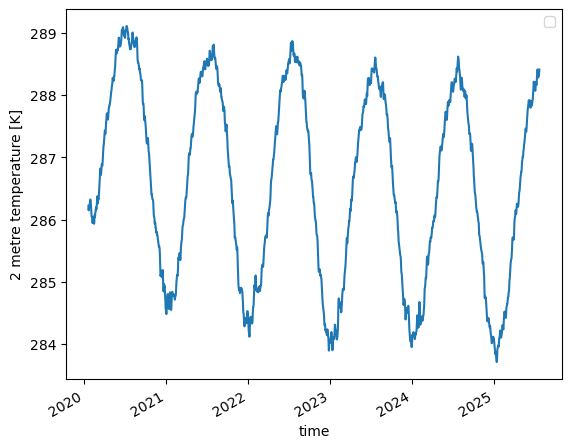

In [2]:
from functions import plot_timeseries


plot_timeseries(
    model="ICON",
    exp="ngc3028",
    variable="2t",
    reader_kw={"source": "P1D", "zoom": 0},
)

The function provides a simple switch `plot_era5` which allows to include ERA5 reanalsys data as reference.
For an easier comparison, one can resample the data to any time frequency and adjust the look of the plot.

2023-06-29 11:10:42 :: Reader :: WARNING  -> lat is sorted in different way between area files and your dataset. Flipping it!


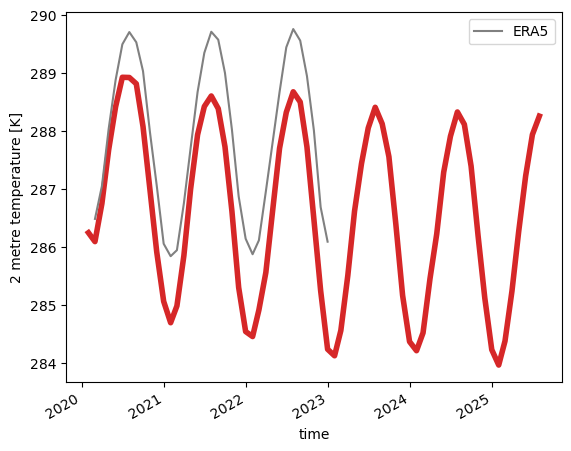

In [3]:
plot_timeseries(
    model="ICON",
    exp="ngc3028",
    variable="2t",
    reader_kw={"source": "P1D", "zoom": 0},
    plot_kw= {"color": "tab:red", "linewidth": 4},
    resample="M",
    plot_era5=True,
)

The CLI interface also allows the user to specify different (model) sources.
In python, this can be achieved by a manual loop

2023-06-29 11:10:51 :: Reader :: WARNING  -> lat is sorted in different way between area files and your dataset. Flipping it!


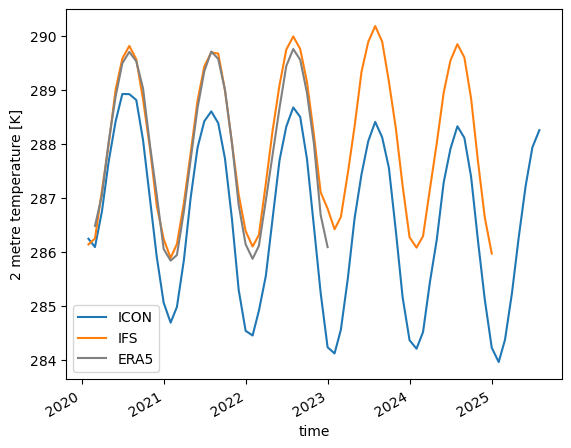

In [4]:
sources = {
    "icon": dict(model="ICON", exp="ngc3028", reader_kw={"source": "P1D", "zoom": 0}, plot_kw=dict(label="ICON")),
    "ifs": dict(model="IFS", exp="tco1279-orca025-cycle3", reader_kw={"source": "lra-r100-monthly"}, plot_kw=dict(label="IFS"), plot_era5=True),
}
                 
for src_config in sources.values():
    plot_timeseries(
        **src_config,
        variable="2t",
        resample="M",
    )

Furthermore, the user can also combine time series and plot them against each other. The resulting "Gregory"-like plot allows the user to investigate the annual cycle as well as to detect model drift (if existing).

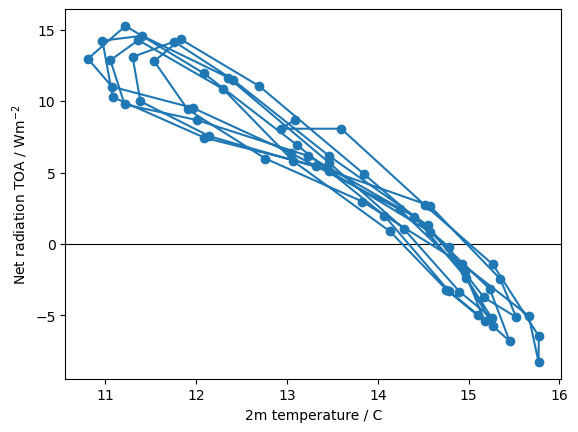

In [5]:
from functions import plot_gregory


plot_gregory(
    model="ICON",
    exp="ngc3028",
    reader_kw={"source": "P1D", "zoom": 0},
)